<a href="https://colab.research.google.com/github/shubhammane7777/Comparing-Algorithms-for-Credit-Risk-Prediction-/blob/main/Comparison_of_algorithms_of_credit_risk_for_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/drive/MyDrive/lending_club_small.csv'
df = pd.read_csv(file_path, low_memory=False)

# Basic info
print("Shape of data:", df.shape)
df.head()


Shape of data: (40000, 144)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,7000.0,7000.0,7000.0,36 months,13.35,237.04,C,C2,9 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,6000.0,6000.0,6000.0,36 months,15.31,208.91,C,C2,NaN,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,14400.0,14400.0,14400.0,36 months,16.99,513.33,D,D1,1 year,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,12775.0,12775.0,12775.0,60 months,14.33,299.45,C,C2,2 years,OWN,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,9100.0,9100.0,9100.0,36 months,12.12,302.78,B,B3,3 years,RENT,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop columns with more than 50% missing values
null_percent = df.isnull().mean() * 100
cols_to_drop = null_percent[null_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns with >50% missing values:", list(cols_to_drop))

# Drop irrelevant columns
irrelevant = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']
df.drop(columns=[col for col in irrelevant if col in df.columns], inplace=True)


print("Shape of data:", df.shape)

Dropped columns with >50% missing values: ['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardshi

In [4]:
print("Shape of data:", df.shape)
df.head()

Shape of data: (40000, 89)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,7000.0,7000.0,7000.0,36 months,13.35,237.04,C,C2,9 years,RENT,...,33.3,0.0,0.0,78425.0,57438.0,21100.0,41625.0,N,Cash,N
1,6000.0,6000.0,6000.0,36 months,15.31,208.91,C,C2,NaN,OWN,...,63.6,0.0,0.0,17700.0,14709.0,16900.0,0.0,N,Cash,N
2,14400.0,14400.0,14400.0,36 months,16.99,513.33,D,D1,1 year,RENT,...,0.0,0.0,0.0,54012.0,45503.0,2300.0,44912.0,N,Cash,N
3,12775.0,12775.0,12775.0,60 months,14.33,299.45,C,C2,2 years,OWN,...,50.0,0.0,0.0,173310.0,19845.0,20800.0,11271.0,N,Cash,N
4,9100.0,9100.0,9100.0,36 months,12.12,302.78,B,B3,3 years,RENT,...,0.0,0.0,0.0,83168.0,53257.0,15800.0,58668.0,N,Cash,N


In [5]:
# Drop columns with more than 50% missing values
null_percent = df.isnull().mean() * 100
cols_to_drop = null_percent[null_percent > 50].index
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns with >50% missing values:", list(cols_to_drop))

# Drop irrelevant columns
irrelevant = ['id', 'member_id', 'url', 'desc', 'emp_title', 'title', 'zip_code']
df.drop(columns=[col for col in irrelevant if col in df.columns], inplace=True)

# Strip and extract the numeric part from 'term' column
df['term'] = df['term'].str.extract('(\d+)').astype(float)



Dropped columns with >50% missing values: []


In [6]:
# Step 1: Check which columns are categorical
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols.tolist())

Categorical columns: ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [7]:
# Step 2: Drop all categorical columns
df_numeric = df.drop(columns=cat_cols)

In [8]:
# Optional: Check remaining columns
print("Remaining numeric columns:", df_numeric.columns.tolist())

Remaining numeric columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', '

In [9]:
# Now drop remaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
df_numeric = df.drop(columns=cat_cols)

# Confirm
print("Remaining columns after drop:", df_numeric.columns.tolist())


Remaining columns after drop: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl'

In [10]:

df_numeric.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,7000.0,7000.0,7000.0,36.0,13.35,237.04,42000.0,1,13.60,2.0,...,0.0,1.0,71.0,33.3,0.0,0.0,78425.0,57438.0,21100.0,41625.0
1,6000.0,6000.0,6000.0,36.0,15.31,208.91,47000.0,0,13.66,0.0,...,0.0,1.0,100.0,63.6,0.0,0.0,17700.0,14709.0,16900.0,0.0
2,14400.0,14400.0,14400.0,36.0,16.99,513.33,36000.0,1,28.57,0.0,...,0.0,1.0,100.0,0.0,0.0,0.0,54012.0,45503.0,2300.0,44912.0
3,12775.0,12775.0,12775.0,60.0,14.33,299.45,40000.0,0,19.68,0.0,...,0.0,1.0,100.0,50.0,0.0,0.0,173310.0,19845.0,20800.0,11271.0
4,9100.0,9100.0,9100.0,36.0,12.12,302.78,45000.0,1,29.25,1.0,...,1.0,1.0,95.0,0.0,0.0,0.0,83168.0,53257.0,15800.0,58668.0


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer
import pandas as pd

X = df_numeric.drop('loan_status', axis=1)
y = df_numeric['loan_status']

# Impute missing values using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns) # Convert back to DataFrame

selector = SelectKBest(score_func=f_classif, k=10)
X_selected_array = selector.fit_transform(X_imputed, y)
selected_columns = X_imputed.columns[selector.get_support()]

X_selected = pd.DataFrame(X_selected_array, columns=selected_columns)
X_selected['loan_status'] = y.reset_index(drop=True)  # Add target back

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [18 19 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Feature Selection Plan
Correlation Matrix:


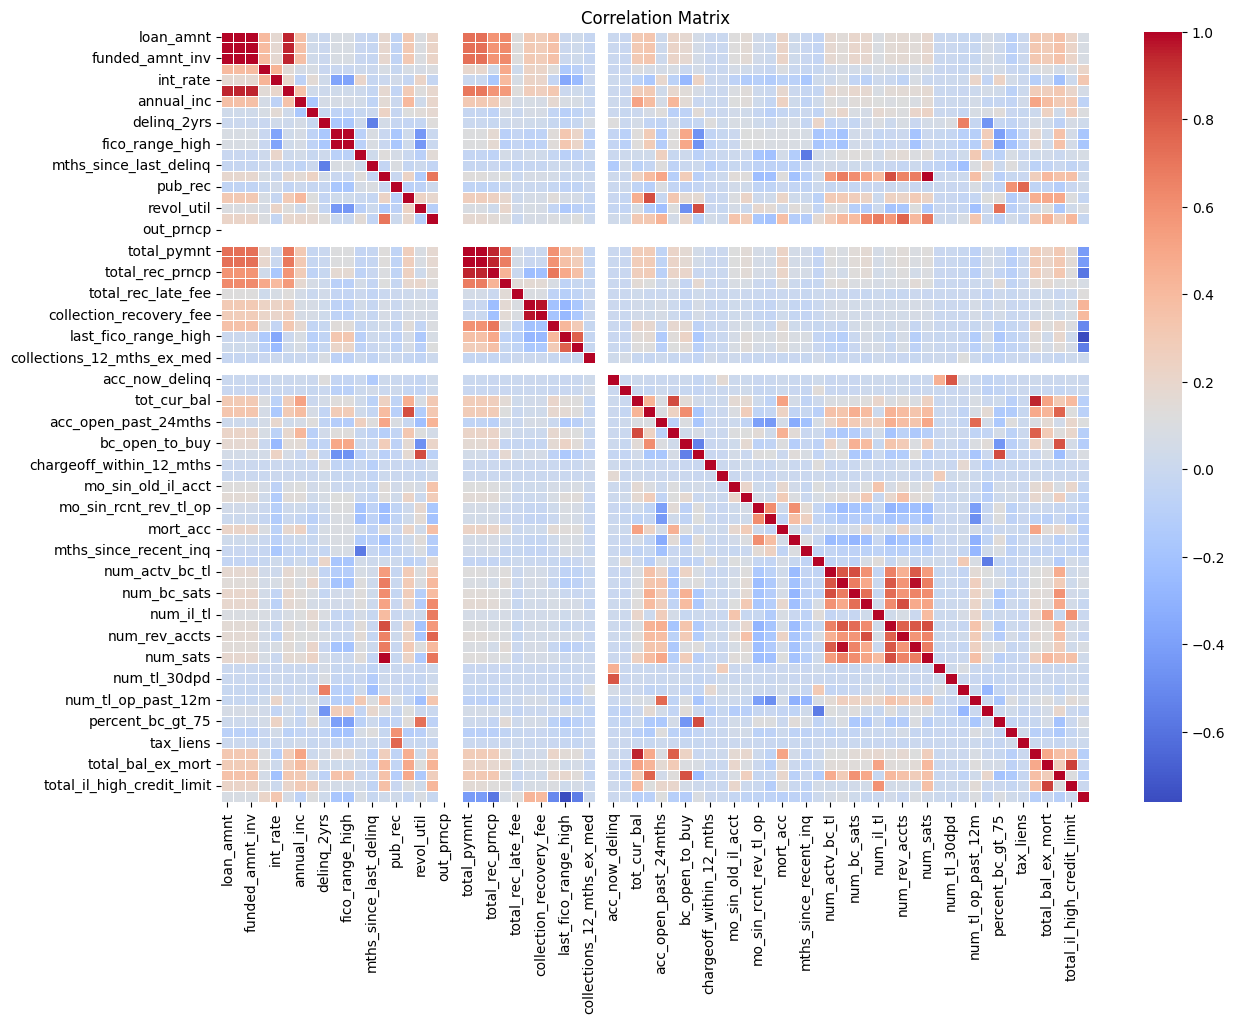

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y to form a complete DataFrame
data = X.copy()
data['loan_status'] = y

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Handling Class Imbalance

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_selected and y are available from previous steps
# Use selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected.drop('loan_status', axis=1),
                                                    X_selected['loan_status'],
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=X_selected['loan_status'])

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: loan_status
1    14000
0    14000
Name: count, dtype: int64
After SMOTE: loan_status
1    14000
0    14000
Name: count, dtype: int64


Baseline Model Training and Evaluation

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.show()


Common Functions for Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

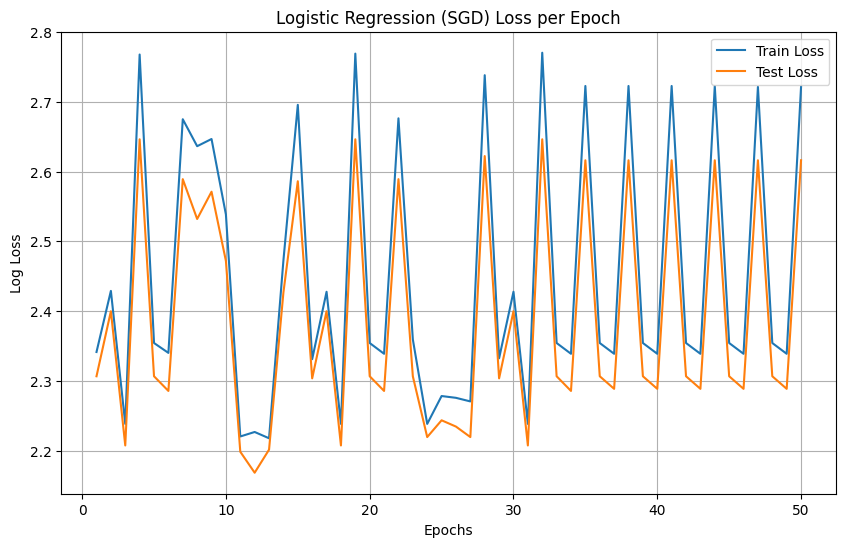

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

epochs = 50
train_losses, test_losses = [], []

model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, random_state=42)

for epoch in range(epochs):
    model.fit(X_train_res, y_train_res)
    y_train_prob = model.predict_proba(X_train_res)
    y_test_prob = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train_res, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Logistic Regression (SGD) Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_accuracies = []
test_accuracies = []
estimators = range(10, 201, 10)

for n in estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_res, y_train_res)
    train_accuracies.append(model.score(X_train_res, y_train_res))
    test_accuracies.append(model.score(X_test, y_test))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_accuracies, label="Train Accuracy")
plt.plot(estimators, test_accuracies, label="Test Accuracy")
plt.xlabel("Number of Trees (Epochs)")
plt.ylabel("Accuracy")
plt.title("Random Forest Performance vs. Trees")
plt.legend()
plt.grid()
plt.show()


⚡ XGBoost Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6000
           1       0.99      0.99      0.99      6000

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

ROC-AUC Score: 0.9991875277777778


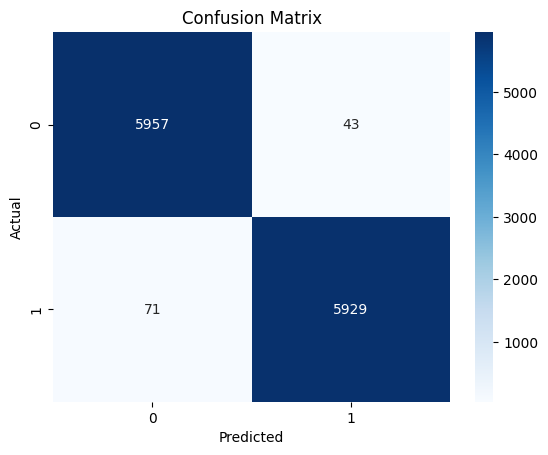

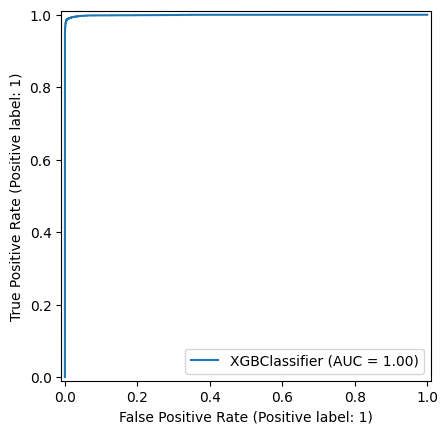

In [ ]:
import xgboost as xgb

eval_result = {}
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)

xgb_model.fit(X_train_res, y_train_res,
              eval_set=[(X_train_res, y_train_res), (X_test, y_test)],
              verbose=False,
              eval_metric='logloss',
              early_stopping_rounds=10,
              callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False)],
              evals_result=eval_result)

# Plot log loss over epochs
train_logloss = eval_result['validation_0']['logloss']
test_logloss = eval_result['validation_1']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Train Log Loss')
plt.plot(test_logloss, label='Test Log Loss')
plt.xlabel("Boosting Rounds (Epochs)")
plt.ylabel("Log Loss")
plt.title("XGBoost Log Loss per Epoch")
plt.legend()
plt.grid()
plt.show()


need to do epocs

correlation matrix, select k-base, sky square

feature select- epocs-plots-results-hypertuning